###**Installing the necessary libraries**

In [1]:
!pip install tensorflow imageio tensorflow-docs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.7/182.7 kB 4.0 MB/s eta 0:00:00


In [2]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow.keras import layers
import time
from IPython import display

####**Loading the MNIST Handwritten Digit Dataset**

In [3]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# shape of the Train Images
train_images.shape

(60000, 28, 28)

In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [6]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5   # Normalize the images to [-1, 1]

In [7]:
# shape of the Train Images
train_images.shape

(60000, 28, 28, 1)

In [8]:
Buffer_size = 60000 # To shuffle the datasets
Batch_size = 256

In [9]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(Buffer_size).batch(Batch_size)

In [10]:
print(train_dataset)

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>


In [11]:
noise = tf.random.normal([1, 100])

print(noise)

tf.Tensor(
[[-1.01298726e+00  1.35883117e+00  4.49477583e-01 -4.30254787e-01
   1.06690311e+00 -1.65719771e+00 -1.74593627e+00  6.26795411e-01
   2.37953469e-01  1.52003837e+00 -1.07201529e+00  1.14615607e+00
  -1.35079396e+00  7.04126596e-01  2.53666496e+00 -1.19996294e-01
  -2.99298674e-01  6.26388181e-04  4.95796293e-01  1.27041447e+00
   1.11565840e+00 -6.59848824e-02  9.64989960e-01  5.09093821e-01
   4.44106549e-01  2.40285039e+00  1.27135500e-01 -1.42560744e+00
  -1.20705163e+00 -9.49790925e-02  1.28845319e-01  9.71927941e-02
  -9.24845099e-01 -1.19664466e+00  1.15195990e+00  1.65357202e-01
  -5.38033247e-01 -4.91723180e-01  1.42065573e+00 -1.24157238e+00
  -3.48109454e-01  6.17693722e-01  5.86068854e-02  6.83669567e-01
   3.32690597e-01 -1.27183831e+00  8.47501397e-01 -5.49795747e-01
   1.05834448e+00  5.23372829e-01  2.71147132e+00 -3.88428569e-01
  -2.58689851e-01  3.11427802e-01 -1.02640390e+00  1.22844994e+00
  -7.18070805e-01  1.20313239e+00  1.71284354e+00 -3.96460146e-01

In [12]:
print(len(noise))

1


In [13]:
print(len(noise[0]))

100


###**Model Creation**



- **Generator:** Learns to create fake images from random noise.

- **Discriminator:** Learns to distinguish real images from fake ones.

- **Training Goal:** Generator tries to fool the discriminator; the discriminator tries not to be fooled.

**Generator**

In [14]:
def make_generator_model():
    model = tf.keras.Sequential()

    # 1. Dense layer: Fully connected layer to project the input noise into a larger feature space
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))

    # 2. Batch normalization: Helps stabilize and speed up training
    model.add(layers.BatchNormalization())

    # 3. LeakyReLU activation: Allows a small gradient when the unit is not active
    model.add(layers.LeakyReLU())

    # 4. Reshape: Converts the flat feature vector into a 3D tensor (7x7x256)
    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)

    # 5. First transposed convolution: Upsample to 7x7x128
    model.add(layers.Conv2DTranspose(
    128,          # Number of output filters (feature maps) — becomes the depth of the output
    (5, 5),       # Kernel size — the filter will be 5x5 in height and width
    strides=(1, 1),# Stride of 1 — controls how much the filter moves per step (no upscaling here)
    padding='same', # Output size will be the same as input size (7x7 in this case)
    use_bias=False  # Do not use bias in this layer (common when followed by BatchNorm)
        )
    )
    assert model.output_shape == (None, 7, 7, 128)  # Ensure expected output shape is achieved
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # 6. Second transposed convolution: Upsample to 14x14x64
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # 7. Final transposed convolution: Upsample to 28x28x1 (grayscale image)
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


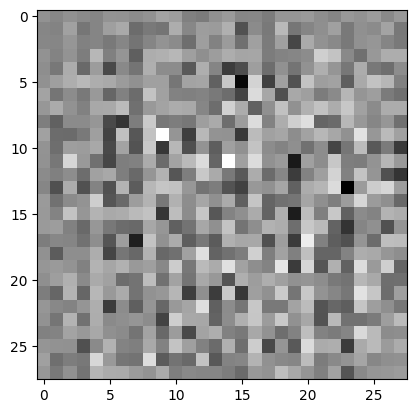

In [15]:
generator = make_generator_model()

# Generate a random noise vector of size 100
noise = tf.random.normal([1, 100])

# Generate an image from the noise (in inference mode)
generated_image = generator(noise, training=False)

# Plot the generated image
plt.imshow(generated_image[0, :, :, 0], cmap='gray')


**Discriminator**

In [16]:
def make_discriminator_model():
    model = tf.keras.Sequential()

    # 1. Conv layer: Downsample input (28x28x1) to (14x14x64)
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                            input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))  # Prevent overfitting

    # 2. Conv layer: Further downsample to (7x7x128)
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # 3. Flatten: Convert 3D feature maps to 1D
    model.add(layers.Flatten())

    # 4. Dense output: One neuron for binary classification (real or fake)
    model.add(layers.Dense(1))

    return model


In [17]:
# using the untrained discriminator to predict whether an image is "Real or "Fake"
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


tf.Tensor([[0.00104206]], shape=(1, 1), dtype=float32)


**Loss and Optimizer**

In [18]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

**Discriminator Loss**

This methods quantifies how well the discriminator is able to distinguish real images from fakes. It compares the discriminator's predictions on real images to an array of 1s, and the disciminator's prediction on fake(generated) images to an array of 0s

In [19]:
tf.ones_like((1,1,1,1,0,1,0,1,1))

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)>

In [20]:
tf.zeros_like((1,1,1,1,0,1,0,1,1))

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>

In [21]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

**Generator Loss**

The generator's loss quantifies how well it was able to trick discriminator. Intuitively, if the generator is performing well, the disciminator will classify the fake images as real(or 1). Here, compare the dicriminators decision in the generated images to an array of 1s

In [22]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

The discriminator and the generator optimizers are different since we will train two networks separately

In [23]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

**Saving the checkpoints**

In [24]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

**Defining the training Loop**

In [25]:
Epochs = 100
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

The training loop begins with generator receives a random seeds as input. That seeds is used to produce an image. The discriminator is then used to classify real images (drawn from the training set) and fake images(produced by the generator). The loss is calculated for each of these models, and the gradients are used to update the generator and discriminator.

In [26]:
# Notice the use of "tf.function",
# this anotation causes the function to be "compiled", (Tensorflow Computation graph)

@tf.function   # decorated function (faster than regular Python)
def train_step(images):
    noise = tf.random.normal([Batch_size, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))



In [27]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

**Generate and Save images**

In [28]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

**Training the model**

Call the train() method defined above to train the generator and discriminator simultaneously. Note, training GANs can be tricky. It's important that the generator and discriminator do not overpower each other(e.g., that they train at a similar rate).

At the begining of the training, the generated images look like a random noise. At training progresses, the generated digits will look incrasingly real. After about 50 epoch, they resemble MNIST digits.

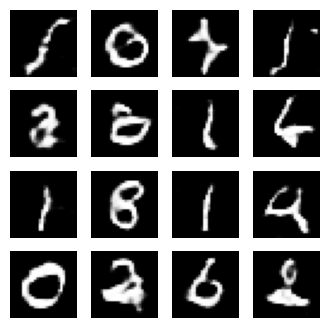

In [29]:
train(train_dataset, Epochs)

In [30]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [31]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open("image_at_epoch_{:04d}.png".format(epoch_no))

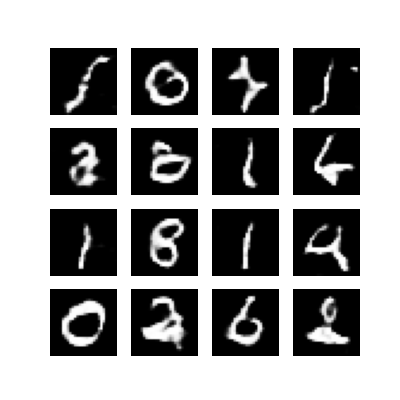

In [32]:
display_image(Epochs)

**Use imageio to create an animated gif using the images saved during training**

In [33]:
# Define the output filename for the animation
anim_file = "dcgan.gif"

# Create a writer object to assemble the GIF
with imageio.get_writer(anim_file, mode="I") as writer:

    # Get all generated image filenames (e.g., image_at_epoch_0001.png)
    filenames = glob.glob("image*.png")

    # Sort the filenames to ensure correct frame order
    filenames = sorted(filenames)

    # Add each image to the GIF
    for filename in filenames:
        image = imageio.imread(filename)  # Read the image from file
        writer.append_data(image)         # Add image to GIF

    # Add the final image one more time for a pause at the end
    image = imageio.imread(filename)
    writer.append_data(image)


<ipython-input-33-56ed394629b9>:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)  # Read the image from file
<ipython-input-33-56ed394629b9>:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)



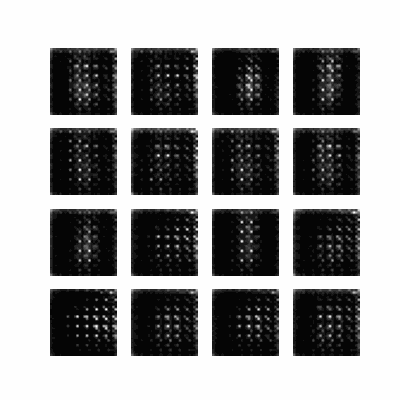

In [34]:
# Import embed module from tensorflow_docs to help visualize media
import tensorflow_docs.vis.embed as embed

# Embed the previously saved GIF animation inside the notebook
embed.embed_file(anim_file)


#####**Save the model to Google drive or local**

In [36]:
generator.save('trained_mnist_DCGAN_model.h5')
